tensor(0.)
tensor(0.)
tensor(0., dtype=torch.float64)
tensor(0.)
tensor(0.)
tensor(0.1003, dtype=torch.float64)
tensor(0.)
tensor(0.)
tensor(0.4012, dtype=torch.float64)


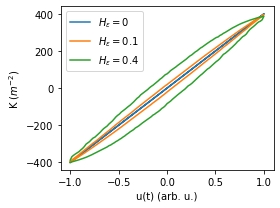

In [17]:

from matplotlib import pyplot as plt
import torch
from hysteresis.base import BaseHysteresis

fig,ax = plt.subplots()
fig.set_size_inches(4,3)
labels = [r'$H_\varepsilon=0$', r'$H_\varepsilon=0.1$',r'$H_\varepsilon=0.4$']
for ele,lbl in zip([0.0,0.235,0.940],labels):

    H = BaseHysteresis(
            trainable=False,
            mesh_scale=0.5,
            fixed_domain = torch.tensor((-1.0, 1.0))
        )

    scale = ele
    m_sat = 1.0
    H.scale = scale
    H.slope = (m_sat - H.scale) * 2.0
    H.offset = -H.slope / 2.0
    test_applied_fields = torch.cat(
        (torch.linspace(-1,1,111) , torch.flipud(torch.linspace(-1,1,111)))
    )

    H.regression()
    M = H(test_applied_fields, return_real=True).detach()

    print(test_applied_fields[55])
    print(test_applied_fields[55+111])
    print(M[55+111] - M[55])


    ax.plot(test_applied_fields, 400*M,label = lbl)


ax.legend()
ax.set_xlabel('u(t) (arb. u.)')
ax.set_ylabel(r'K ($m^{-2}$)')
fig.tight_layout()
fig.savefig('magnetization_curves.svg')